# Import the Basic Packages

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Import the File

In [2]:
data = pd.read_csv('dataset_Facebook.csv', sep = ';')
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


# Part 1

1) What is the most common type of post? (The one that appears the most in this data)

2) On average, which type of post received the most 'Page total likes'? Does this agree with the post 'like' metric?

3) On average, do paid video posts (Paid=1) receive more shares than the unpaid ones? Given that this data is for a Facebook page of a cosmetics brand, can youthink of any reasons for the results you obtain? (i.e. if no, then why not?)

4) ‘Lifetime post consumers’ is the number of people who clicked anywhere in a post. ‘Lifetime post consumption’ is the number of clicks anywhere in a post. For each post, approximate the ‘consumption per user’ and determine the post type and month that, on average, receive the most ‘consumptions per user’. Is this result different from the total ‘Lifetime post consumers’ by post type and month?

5) For the ‘Photo’ type posts, find the month that show the greatest absolute skew in the distribution of the ‘consumptions per user’. Use whichever definition of ‘skew’ you think is appropriate for this data (e.g. it can be any numeric or visual estimate).

# 1)

In [3]:
data.groupby('Type').size()

Type
Link       22
Photo     426
Status     45
Video       7
dtype: int64

Photo is the most common type of post with 426 (85.2%) out of the total 500 posts

# 2)

In [4]:
data.groupby('Type')['Page total likes'].mean()

Type
Link      116363.181818
Photo     122354.171362
Status    132647.044444
Video     135014.857143
Name: Page total likes, dtype: float64

In [5]:
data.groupby('Type')['like'].mean()

Type
Link       73.318182
Photo     182.611765
Status    176.711111
Video     231.428571
Name: like, dtype: float64

Video posts recieved the highest average Page total likes for the four post types with 135,014.86, this does agree with the 'like' metric in terms of Video posts being the post type with the highest average likes value.

# 3)

In [6]:
data1 = data[data.Type == 'Video']
data.groupby(['Paid'])['share'].mean()

Paid
0.0    25.219101
1.0    32.503597
Name: share, dtype: float64

# 4)

In [7]:
data['Consumption per. User'] = data['Lifetime Post Consumptions'] / data['Lifetime Post Consumers']
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Consumption per. User
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,1.458716
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,1.229978
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,1.362832
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,1.416456
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,1.414634


In [8]:
data.groupby('Type')['Consumption per. User'].mean()

Type
Link      1.305035
Photo     1.848347
Status    1.435989
Video     1.534767
Name: Consumption per. User, dtype: float64

In [9]:
data.groupby('Post Month')['Consumption per. User'].mean()

Post Month
1     1.336479
2     1.380829
3     3.497949
4     1.504329
5     1.564941
6     2.283264
7     1.824448
8     1.528448
9     1.428994
10    1.721919
11    1.710590
12    1.453134
Name: Consumption per. User, dtype: float64

In [10]:
data.groupby('Type')['Lifetime Post Consumers'].mean()

Type
Link       292.681818
Photo      690.431925
Status    1949.555556
Video     1584.714286
Name: Lifetime Post Consumers, dtype: float64

In [11]:
data.groupby('Post Month')['Lifetime Post Consumers'].mean()

Post Month
1      965.360000
2     1371.192308
3      937.194444
4      764.740000
5      697.189189
6      865.897959
7      961.346154
8      670.058824
9      765.166667
10     727.683333
11     406.577778
12     742.500000
Name: Lifetime Post Consumers, dtype: float64

Photos and March are the type and month with the highest average Consumption per. User. This is different to the type and month with the highest Lifetime Post Consumers, which are Status and February.

A possible reason for this is that there are more each consumer for the status type and February month view each post a fewer number of times than users in the Photo type and March month. They may be more numerous but view each post less often.

# 5)

In [12]:
data2 = data[data.Type == 'Photo']
data2.groupby(['Post Month'])['Consumption per. User'].skew()

Post Month
1     1.445928
2     1.387401
3     0.932101
4     1.320492
5     0.131609
6     4.608803
7     6.593561
8     1.364746
9     0.497539
10    3.576568
11    4.963404
12    5.185794
Name: Consumption per. User, dtype: float64

July is the month with the highest skew w.r.t. Consumption per. User for Photo posts

Skew is the measure of asymmetry of the statisical distribution from an assumed Normal, the higher the number the more asymmetrical the distribution.

# Part 2

You are now asked to build a model that can predict ‘Lifetime post consumers’ using any or all of the following features: Category, Type, Page total likes, Post Month, Post Weekday, Post Hour, Paid. Note that Category 1-3 correspond to {action, product, inspiration}. You may derive new features from the listed seven, if you deem it necessary.

You are free to select any modelling approach, but you should be ready to justify it. Please comment on what variable transformations and preprocessing you perform prior to training a model. Since this is a small dataset, you can try several train-test splits. Along with the model, please provide the model performance estimates.

# Check the tpyes of the columns

In [13]:
data.dtypes

Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

# Look at the Relationship Between the two Continuous Variables, Page total likes vs. Lifetime Post Consumers 

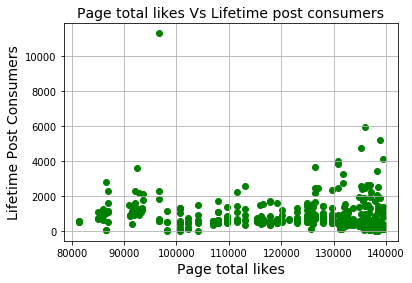

In [14]:
plt.scatter(data['Page total likes'], data['Lifetime Post Consumers'], color='green')
plt.title('Page total likes Vs Lifetime post consumers', fontsize=14)
plt.xlabel('Page total likes', fontsize=14)
plt.ylabel('Lifetime Post Consumers', fontsize=14)
plt.grid(True)
plt.show()

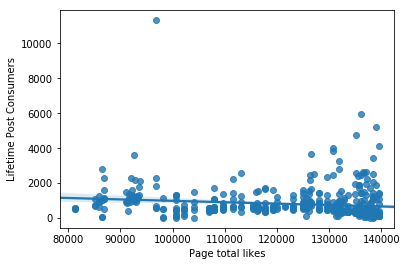

In [15]:
import seaborn as sns
% matplotlib inline
scat1 = sns.regplot(x='Page total likes', y='Lifetime Post Consumers', scatter=True, data=data)
scat1

# Restrict the Dataset down to the Relevant Variables

In [16]:
model_data = data[['Category','Type','Page total likes','Post Month','Post Weekday','Post Hour','Paid','Lifetime Post Consumers']]
model_data.head()

,Category,Type,Page total likes,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Consumers
0,2,Photo,139441,12,4,3,0.0,109
1,2,Status,139441,12,3,10,0.0,1361
2,3,Photo,139441,12,3,3,0.0,113
3,2,Photo,139441,12,2,10,1.0,790
4,2,Photo,139441,12,2,3,0.0,410


# Change the Data types of the Categorical Variables to category to use get_dummmies

In [17]:
model_data['Category'] = model_data['Category'].astype('category')
model_data['Post Month'] = model_data['Post Month'].astype('category')
model_data['Post Weekday'] = model_data['Post Weekday'].astype('category')
model_data['Post Hour'] = model_data['Post Hour'].astype('category')
model_data.dtypes

C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ryanwala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Category                   category
Type                         object
Page total likes              int64
Post Month                 category
Post Weekday               category
Post Hour                  category
Paid                        float64
Lifetime Post Consumers       int64
dtype: object

# Convert the Categorical Variables into new Dummy Columns (Category, Type, Post Month, Post Day, Post Hour)

In [18]:
data_dummied = pd.get_dummies(model_data)
data_dummied = data_dummied.apply(pd.to_numeric).fillna(0)
data_dummied.head()

,Page total likes,Paid,Lifetime Post Consumers,Category_1,Category_2,Category_3,Type_Link,Type_Photo,Type_Status,Type_Video,...,Post Hour_13,Post Hour_14,Post Hour_15,Post Hour_16,Post Hour_17,Post Hour_18,Post Hour_19,Post Hour_20,Post Hour_22,Post Hour_23
0,139441,0.0,109,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,139441,0.0,1361,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,139441,0.0,113,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,139441,1.0,790,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,139441,0.0,410,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Check to make sure that there are no null values in the DataFrame

In [19]:
np.any(np.isnan(data_dummied))

False

# Split the Dataset into Target and Predictor Variables

In [20]:
X = data_dummied.loc[:, data_dummied.columns != 'Lifetime Post Consumers']
y = data_dummied.loc[:, ['Lifetime Post Consumers']]

# Implement Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Fit a Linear Regression Model to the Training Data

In [31]:
from sklearn.linear_model import LinearRegression
lin_res = LinearRegression()
lin_res.fit(X_train,y_train)

print(list(zip(lin_res.coef_, list(X_train.columns.values))))

[(array([ 1.88956622e-02,  8.79602351e+01,  1.62795496e+02, -6.36654427e+01,
       -9.91300531e+01, -9.99018072e+02, -4.94708164e+02,  9.11401692e+02,
        5.82324544e+02,  1.15686094e+03,  1.14730576e+03,  2.66056660e+02,
        2.55159289e+02,  3.83005474e+01,  4.40431600e+01, -6.24537262e+01,
       -4.37890994e+02, -3.54791667e+02, -5.85952133e+02, -8.97597919e+02,
       -5.69039917e+02, -6.64354378e+00, -6.68105839e+01,  1.51906344e+02,
       -8.10659124e+01, -6.39017402e+01, -3.19220304e+01,  9.84374671e+01,
       -1.42758561e+01, -1.48672025e+02,  9.62356902e+01, -6.34387163e+01,
        5.66125581e+02, -4.08790097e+01, -1.27187851e+01, -2.65449879e+02,
        1.22084214e+02,  2.30440125e+02, -4.06948617e+01,  9.38728861e+01,
        5.49080713e+00,  6.37495635e+01, -1.59574745e+02,  5.73910495e+01,
        1.33035276e+02, -6.30324222e+02,  0.00000000e+00,  3.11968768e+02,
       -6.68874565e+01, -2.37478404e+02]), 'Page total likes')]


# Score the Model with MSE, RMSE and R^2 Accuray Measures

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_y_pred = lin_res.predict(X_test)

print(mean_squared_error(y_test, model_y_pred))
print(np.sqrt(mean_squared_error(y_test, model_y_pred)))
print(r2_score(y_test, model_y_pred))

1663123.3544166451
1289.6213996427964
0.08218246461510381


# Now try another Model, Ridge Regression & Look at the Skew of the Dependent Variable 'Lifetime Post Consumers'

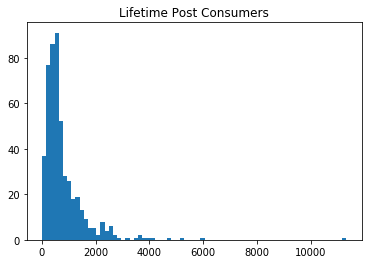

In [25]:
plt.hist(data['Lifetime Post Consumers'], bins='auto')
plt.title("Lifetime Post Consumers")
plt.show()

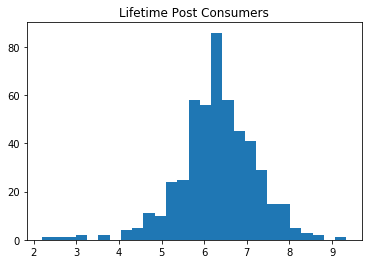

In [26]:
plt.hist(np.log(data['Lifetime Post Consumers']), bins='auto')
plt.title("Lifetime Post Consumers")
plt.show()

In [27]:
data['Lifetime Post Consumers'].skew()

5.0330749530542205

# Fit a Ridge Model to the Data using  GridSearch to Tune the Alpha Hyperparameter

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()), ('ridge', Ridge())]

pipeline = Pipeline(steps)

# create an evenly spaced list of numbers from -4 to 0 on a log scale with 50 points
parameters = {'ridge__alpha':np.logspace(-4, 0, 50)}

cv = GridSearchCV(pipeline, parameters, cv=3)

cv.fit(X_train, y_train)

y_pred_test = cv.predict(X_test)

# Calculate the Accuracy Scores of the Ridge Model

In [29]:
print(mean_squared_error(y_test, y_pred_test))
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))
print(r2_score(y_test, y_pred_test))

1651277.6535322887
1285.0204875924308
0.08871967784208079


The Ridge Regression Model accounts for 8.87% of the variance in the data

# Log-Transform Lifetime Post Consumers

In [30]:
y = np.log(y)

# Re-do Train Test Split with the new Log-Transformed y

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Re-Run the Linear Regression Model with the Log-Transformed y

In [32]:
from sklearn.linear_model import LinearRegression
lin_res = LinearRegression()
lin_res.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Calculate the Accuracy Scores

In [33]:
model_y_pred = lin_res.predict(X_test)

print(mean_squared_error(y_test, model_y_pred))
print(np.sqrt(mean_squared_error(y_test, model_y_pred)))
print(r2_score(y_test, model_y_pred))

0.7315648520200645
0.8553156446716408
0.21802886154579504


The Linear Regression Model with Log-Transformed y accounts for 21.8% of the variance in the data

# Re-Run the Ridge Model with the Log-Transformed y

In [34]:
steps = [('scaler', StandardScaler()),('ridge', Ridge())]

pipeline = Pipeline(steps)

parameters = {'ridge__alpha':np.logspace(-4, 0, 50)}

cv = GridSearchCV(pipeline, parameters, cv=3)

cv.fit(X_train, y_train)

y_pred_test = cv.predict(X_test)

# Calculate the Accuracy Measures

In [35]:
print(mean_squared_error(y_test, y_pred_test))
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))
print(r2_score(y_test, y_pred_test))

0.7324717186692798
0.8558456161418833
0.21705950996451695


The Ridge Regression Model with Log-Transformed y accounts for 21.71% of the variance in the data.

# What Could be Done to Potentially Improve the Model

Does the other comntinuous variable, 'Page total likes' also need to be transformed?

Also, other variables from the original dataset could be included, for example the share and like fields.

Use a model like the MARS (Multivariate Adaptive Regression Splines) model which can take into account non-linear relationships between the predictor and target variable, as well as accounting for interactions between the predictor variables.

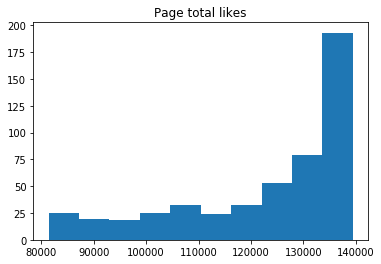

In [36]:
plt.hist(data['Page total likes'], bins='auto')
plt.title("Page total likes")
plt.show()

In [37]:
data['Page total likes'].skew()

-0.9824479439295528

# References

https://www.kaggle.com/jsaadani/simple-ridge-regression-in-python

http://kenbenoit.net/assets/courses/ME104/logmodels2.pdf

https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf